<a href="https://colab.research.google.com/github/sayakpaul/Training-BatchNorm-and-Only-BatchNorm/blob/master/CIFAR_Subset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow Imports
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [2]:
# Which GPU?
!nvidia-smi

Sun May  3 07:03:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!wget https://raw.githubusercontent.com/GoogleCloudPlatform/keras-idiomatic-programmer/master/zoo/resnet/resnet_cifar10.py

In [0]:
# Other imports
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import matplotlib.pyplot as plt
import tensorflow as tf
import resnet_cifar10
import numpy as np
import time

# Random seed fixation
tf.random.set_seed(666)
np.random.seed(666)

In [0]:
def get_training_model():
    # ResNet20
    n = 2
    depth =  n * 9 + 2
    n_blocks = ((depth - 2) // 9) - 1

    # The input tensor
    inputs = Input(shape=(32, 32, 3))

    # The Stem Convolution Group
    x = resnet_cifar10.stem(inputs)

    # The learner
    x = resnet_cifar10.learner(x, n_blocks)

    # The Classifier for 10 classes
    outputs = resnet_cifar10.classifier(x, 10)

    # Instantiate the Model
    model = Model(inputs, outputs)
    
    return model

In [0]:
def plot_training(H):
	# construct a plot that plots and saves the training history
	with plt.xkcd():
		plt.figure()
		plt.plot(H.history["loss"], label="train_loss")
		plt.plot(H.history["val_loss"], label="val_loss")
		plt.plot(H.history["accuracy"], label="train_acc")
		plt.plot(H.history["val_accuracy"], label="val_acc")
		plt.title("Training Loss and Accuracy")
		plt.xlabel("Epoch #")
		plt.ylabel("Loss/Accuracy")
		plt.legend(loc="lower left")
		plt.show()

In [0]:
# Load the training set of CIFAR10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [0]:
# Train and validation on first 10000 and 2000 images respectively
(x_train_frac, y_train_frac) = x_train[:10000], y_train[:10000]
(x_test_frac, y_test_frac) = x_test[:2000], y_test[:2000]

In [0]:
BATCH_SIZE = 128

def normalize(image, label):
    return tf.image.convert_image_dtype(image, tf.float32), label

def augment(image,label):
    image = tf.image.resize_with_crop_or_pad(image, 40, 40) # Add 8 pixels of padding
    image = tf.image.random_crop(image, size=[32, 32, 3]) # Random crop back to 28x28
    image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
    image = tf.clip_by_value(image, 0., 1.)
    
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((x_train_frac, y_train_frac))
train_ds = (
    train_ds
    .shuffle(1024)
    .map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

test_ds = tf.data.Dataset.from_tensor_slices((x_test_frac, y_test_frac))
test_ds = (
    test_ds
    .map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

In [12]:
model = get_training_model()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_232 (Conv2D)             (None, 32, 32, 16)   448         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_224 (BatchN (None, 32, 32, 16)   64          conv2d_232[0][0]                 
__________________________________________________________________________________________________
re_lu_224 (ReLU)                (None, 32, 32, 16)   0           batch_normalization_224[0][0]    
____________________________________________________________________________________________

- Total params: 575,114
- Trainable params: 571,114
- Non-trainable params: 4,000


Epoch 1/75
79/79 [==============================] - 3s 44ms/step - loss: 2.2924 - accuracy: 0.1321 - val_loss: 2.2533 - val_accuracy: 0.1605
Epoch 2/75
79/79 [==============================] - 3s 35ms/step - loss: 2.1768 - accuracy: 0.1951 - val_loss: 2.1988 - val_accuracy: 0.1830
Epoch 3/75
79/79 [==============================] - 3s 36ms/step - loss: 2.0928 - accuracy: 0.2296 - val_loss: 2.1401 - val_accuracy: 0.1970
Epoch 4/75
79/79 [==============================] - 3s 35ms/step - loss: 2.0396 - accuracy: 0.2411 - val_loss: 2.0690 - val_accuracy: 0.2325
Epoch 5/75
79/79 [==============================] - 3s 35ms/step - loss: 1.9946 - accuracy: 0.2577 - val_loss: 2.0083 - val_accuracy: 0.2705
Epoch 6/75
79/79 [==============================] - 3s 35ms/step - loss: 1.9692 - accuracy: 0.2634 - val_loss: 1.9671 - val_accuracy: 0.2740
Epoch 7/75
79/79 [==============================] - 3s 35ms/step - loss: 1.9359 - accuracy: 0.2877 - val_loss: 1.9281 - val_accuracy: 0.2995
Epoch 8/75
79

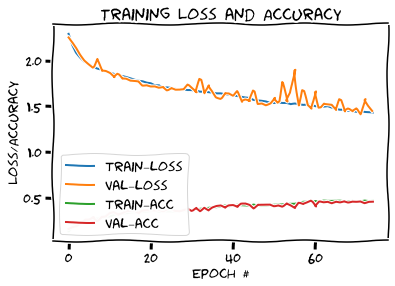

In [13]:
# Train model
model = get_training_model()
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
start = time.time()
h = model.fit(train_ds,
         validation_data=test_ds,
         epochs=75)
end = time.time()
print("Network takes {:.3f} seconds to train".format(end - start))
plot_training(h)

Epoch 1/75
79/79 [==============================] - 3s 39ms/step - loss: 2.1259 - accuracy: 0.2033 - val_loss: 2.0901 - val_accuracy: 0.1805
Epoch 2/75
79/79 [==============================] - 3s 35ms/step - loss: 1.9193 - accuracy: 0.2812 - val_loss: 2.5864 - val_accuracy: 0.1565
Epoch 3/75
79/79 [==============================] - 3s 35ms/step - loss: 1.8297 - accuracy: 0.3105 - val_loss: 3.1432 - val_accuracy: 0.1460
Epoch 4/75
79/79 [==============================] - 3s 36ms/step - loss: 1.7626 - accuracy: 0.3462 - val_loss: 1.8474 - val_accuracy: 0.2975
Epoch 5/75
79/79 [==============================] - 3s 36ms/step - loss: 1.7062 - accuracy: 0.3700 - val_loss: 1.7207 - val_accuracy: 0.3805
Epoch 6/75
79/79 [==============================] - 3s 36ms/step - loss: 1.6396 - accuracy: 0.3950 - val_loss: 1.7648 - val_accuracy: 0.3760
Epoch 7/75
79/79 [==============================] - 3s 36ms/step - loss: 1.5987 - accuracy: 0.4120 - val_loss: 2.0496 - val_accuracy: 0.3200
Epoch 8/75
79

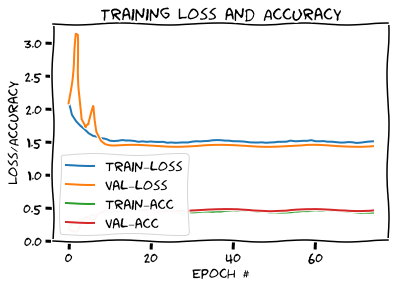

In [15]:
# Train model with a decay schedule
first_decay_steps = 1000
lr_decayed_fn = (
  tf.keras.experimental.CosineDecay(
      initial_learning_rate=0.1,
      decay_steps=first_decay_steps))

model = get_training_model()
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr_decayed_fn), metrics=["accuracy"])
start = time.time()
h = model.fit(train_ds,
         validation_data=test_ds,
         epochs=75)
end = time.time()
print("Network takes {:.3f} seconds to train".format(end - start))
plot_training(h)

Epoch 1/75
79/79 [==============================] - 3s 40ms/step - loss: 2.0763 - accuracy: 0.2206 - val_loss: 2.1847 - val_accuracy: 0.1725
Epoch 2/75
79/79 [==============================] - 3s 35ms/step - loss: 1.8929 - accuracy: 0.2943 - val_loss: 2.0039 - val_accuracy: 0.2250
Epoch 3/75
79/79 [==============================] - 3s 35ms/step - loss: 1.8104 - accuracy: 0.3267 - val_loss: 2.2286 - val_accuracy: 0.1950
Epoch 4/75
79/79 [==============================] - 3s 35ms/step - loss: 1.7515 - accuracy: 0.3465 - val_loss: 2.1538 - val_accuracy: 0.2305
Epoch 5/75
79/79 [==============================] - 3s 35ms/step - loss: 1.7022 - accuracy: 0.3715 - val_loss: 1.6909 - val_accuracy: 0.3870
Epoch 6/75
79/79 [==============================] - 3s 35ms/step - loss: 1.6727 - accuracy: 0.3838 - val_loss: 2.1626 - val_accuracy: 0.3055
Epoch 7/75
79/79 [==============================] - 3s 35ms/step - loss: 1.6549 - accuracy: 0.3966 - val_loss: 1.8766 - val_accuracy: 0.3390
Epoch 8/75
79

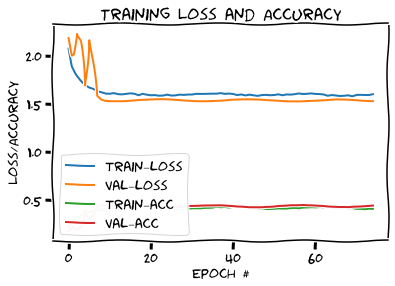

In [16]:
# Train model with a different decay schedule
first_decay_steps = 1000
lr_decayed_fn = (
  tf.keras.experimental.LinearCosineDecay(
      initial_learning_rate=0.1,
      decay_steps=first_decay_steps))

model = get_training_model()
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr_decayed_fn), metrics=["accuracy"])
start = time.time()
h = model.fit(train_ds,
         validation_data=test_ds,
         epochs=75)
end = time.time()
print("Network takes {:.3f} seconds to train".format(end - start))
plot_training(h)

In [17]:
model = get_training_model()

for layer in model.layers:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        if hasattr(layer, "trainable"):
            layer.trainable=False

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_342 (Conv2D)             (None, 32, 32, 16)   448         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_324 (BatchN (None, 32, 32, 16)   64          conv2d_342[0][0]                 
__________________________________________________________________________________________________
re_lu_324 (ReLU)                (None, 32, 32, 16)   0           batch_normalization_324[0][0]    
____________________________________________________________________________________________

- Total params: 575,114
- Trainable params: 4,000
- Non-trainable params: 571,114

Epoch 1/75
79/79 [==============================] - 3s 32ms/step - loss: 2.4319 - accuracy: 0.1034 - val_loss: 2.3069 - val_accuracy: 0.1430
Epoch 2/75
79/79 [==============================] - 2s 27ms/step - loss: 2.4188 - accuracy: 0.1041 - val_loss: 2.3108 - val_accuracy: 0.1500
Epoch 3/75
79/79 [==============================] - 2s 28ms/step - loss: 2.4152 - accuracy: 0.1042 - val_loss: 2.3181 - val_accuracy: 0.1365
Epoch 4/75
79/79 [==============================] - 2s 27ms/step - loss: 2.3999 - accuracy: 0.0999 - val_loss: 2.3247 - val_accuracy: 0.1130
Epoch 5/75
79/79 [==============================] - 2s 27ms/step - loss: 2.3886 - accuracy: 0.1065 - val_loss: 2.3264 - val_accuracy: 0.1175
Epoch 6/75
79/79 [==============================] - 2s 27ms/step - loss: 2.3766 - accuracy: 0.1091 - val_loss: 2.3262 - val_accuracy: 0.1205
Epoch 7/75
79/79 [==============================] - 2s 27ms/step - loss: 2.3725 - accuracy: 0.1132 - val_loss: 2.3235 - val_accuracy: 0.1200
Epoch 8/75
79

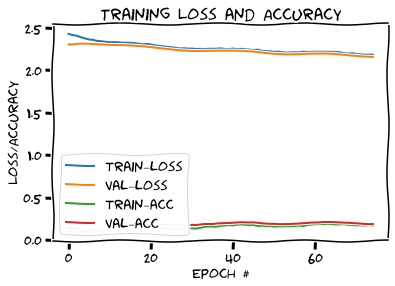

In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
start = time.time()
h = model.fit(train_ds,
         validation_data=test_ds,
         epochs=75)
end = time.time()
print("Network takes {:.3f} seconds to train".format(end - start))
plot_training(h)

Epoch 1/75
79/79 [==============================] - 3s 32ms/step - loss: 2.3823 - accuracy: 0.1155 - val_loss: 2.2982 - val_accuracy: 0.0945
Epoch 2/75
79/79 [==============================] - 2s 28ms/step - loss: 2.3319 - accuracy: 0.1205 - val_loss: 2.2864 - val_accuracy: 0.1125
Epoch 3/75
79/79 [==============================] - 2s 28ms/step - loss: 2.3010 - accuracy: 0.1252 - val_loss: 2.2740 - val_accuracy: 0.1345
Epoch 4/75
79/79 [==============================] - 2s 27ms/step - loss: 2.2809 - accuracy: 0.1289 - val_loss: 2.2533 - val_accuracy: 0.1625
Epoch 5/75
79/79 [==============================] - 2s 28ms/step - loss: 2.2595 - accuracy: 0.1487 - val_loss: 2.2380 - val_accuracy: 0.1835
Epoch 6/75
79/79 [==============================] - 2s 28ms/step - loss: 2.2510 - accuracy: 0.1470 - val_loss: 2.2229 - val_accuracy: 0.1930
Epoch 7/75
79/79 [==============================] - 2s 27ms/step - loss: 2.2454 - accuracy: 0.1568 - val_loss: 2.2144 - val_accuracy: 0.2025
Epoch 8/75
79

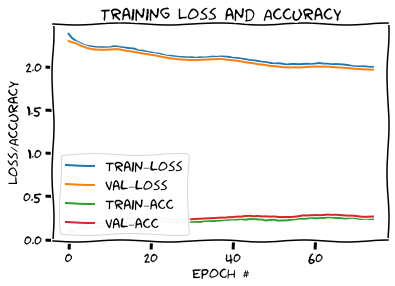

In [19]:
model = get_training_model()

for layer in model.layers:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        if hasattr(layer, "trainable"):
            layer.trainable=False

# Train model with a decay schedule
first_decay_steps = 1000
lr_decayed_fn = (
  tf.keras.experimental.CosineDecayRestarts(
      initial_learning_rate=0.1,
      first_decay_steps=first_decay_steps))

model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr_decayed_fn), metrics=["accuracy"])

start = time.time()
h = model.fit(train_ds,
         validation_data=test_ds,
         epochs=75)
end = time.time()
print("Network takes {:.3f} seconds to train".format(end - start))
plot_training(h)